### Загружаем библиотеки, необходимые для работы программы

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загружаем данные для обучения
#### Это будет 60 000 черно-белых картинок размером 28х28 точек
#### На этих картинках нейронная сеть будет учиться

In [43]:
# Load Train dataset
train_data = pd.read_csv('mnist_train.csv')
train_data.shape

(60000, 785)

### Загружаем данные, на которых программа будет проверять качество обучения
#### 10 000 аналогичных картинок. Мы их покажем нейронной сети только один раз - когда обучение закончится, - чтобы оценить качество обучения
#### Эти картинки - общеизвестный и популярный набор данных, используемый на соревнованиях дата-сатанистов

In [44]:
# Load Test dataset
test_data = pd.read_csv('mnist_test.csv')
test_data.shape

(10000, 785)

### Посмотрим на какую-нибудь картинку, чтобы понимать, о чём речь

In [45]:
#
# ЭТОТ ПАРАМЕТР МОЖНО МЕНЯТЬ В ДИАПАЗОНЕ ОТ 0 до 59999
#
ITEM_TO_SHOW = 1234

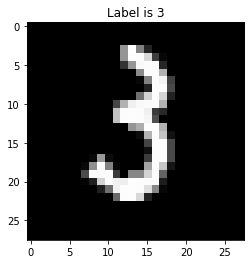

In [46]:
# The first column is the label
label = train_data.iloc[ITEM_TO_SHOW, 0]

# The rest of columns are pixels
pixels = train_data.iloc[ITEM_TO_SHOW, 1:]

# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels, cmap='gray')
plt.show()

### Тут происходят некоторые важные действия по подготовке данных к обучению

In [47]:
# Separate train labels
train_labels = train_data.label

del train_data['label']

# Transform train labels to classes for cross_entropy
train_labels = pd.get_dummies(train_labels)

# Separate test labels
test_labels = test_data.label

del test_data['label']

# Scale data to 0..1
train_data = train_data / 255.
test_data = test_data / 255.

### Здесь мы определяем структуру нашей нейронной сети (a.k.a. Искусственного Интеллекта)
#### Используется очень простая нейронная сеть, состоящая из всего трех уровней (в реальной жизни используются десятки и сотни уровней)
#### Первый уровень - входной, это наши картинки; второй уровень - т.н. "скрытый"; третий уровень - выходной, т.е. тут уже результат.
#### На втором уровне 800 нейронов
#### Обратите внимание: в данной сети получилось примерно 636 000 переменных, которые нейронная сеть будет подбирать в процессе обучения, чтобы максимально точно приспособиться к нашим данным

In [48]:
neural_network = Sequential()

neural_network.add(Dense(800, input_dim=784))
neural_network.add(Activation('relu'))
neural_network.add(Dense(10))
neural_network.add(Activation('softmax'))

neural_network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
neural_network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 800)               628000    
_________________________________________________________________
activation_7 (Activation)    (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                8010      
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


### Самое интересное: обучение нейронной сети
#### Сеть прогонит через себя все 60 000 картинок 10 раз.
#### В конце обратите внимание на общее время обучения. Оно должно быть порядка 50 секунд. Настоящие нейронные сети, которые обладают крайне сложной структурой, учатся часами-днями-неделями на специальном оборудовании - GPU

In [49]:
%%time

# Required constants
MINIBATCH_SIZE = 64
NUM_OF_EPOCHS = 10

history = neural_network.fit(train_data, train_labels, batch_size=MINIBATCH_SIZE, epochs=NUM_OF_EPOCHS, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2124 - accuracy: 0.9379
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0808 - accuracy: 0.9751
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0518 - accuracy: 0.9838
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0350 - accuracy: 0.9894
Epoch 5/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0260 - accuracy: 0.9912
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0191 - accuracy: 0.9937
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0158 - accuracy: 0.9951
Epoch 8/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0119 - accuracy: 0.9962
Epoch 9/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0107 - accuracy: 0.9967
Epoch 10/10
60000/60000 [==============================

### Теперь посмотрим, насколько хорошо нейронная сеть научилась
#### Для этого мы покажем ей те 10 000 картинок, которые мы в начале загрузили, но еще не использовали

In [50]:
# Here our neural network makes prediction on _unseen_ test data
prediction = neural_network.predict(test_data)

# Transform a little bit
prediction = np.apply_along_axis(argmax, 1, prediction)

# Finally print the accuracy
final_score = accuracy_score(test_labels, prediction)
print(f"Correctly predicted in {final_score:.2%} cases out of {test_labels.shape[0]} samples!")

Correctly predicted in 98.26% cases out of 10000 samples!


### Теперь проверим работу сети на картинке, которую нарисовал от руки коллега Олега ;)
#### Вот эта картинка:

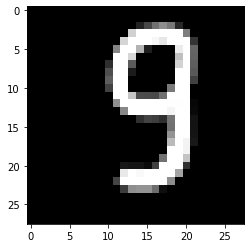

In [51]:
# Read own own hand-written digit and show it
img = cv2.imread("./Peter_Digit_06.png", 0)
plt.imshow(img, cmap='gray')
plt.show()

#### Аудитория замирает в волнительном ожидании....

In [52]:
# Resize to be 28x28
img = cv2.resize(img, (28, 28))

# Scale to 0..1
img = img / 255.

# What digit might be there?
prediction = neural_network.predict(img.reshape((1, 784)))
print(f"AI thinks that it's {prediction.argmax()}")

AI thinks that it's 3
